# Ornstein Uhlenbeck mean-reverting process

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
plt.style.use('bmh')

In [2]:
def simulate_path(k, theta, sigma, r_0=None):
	r_0 = theta if r_0 is None else r_0

	T = 1
	n = 1000
	ts = np.linspace(0,T,n+1)
	rts = []
	dt = T/n

	for t in ts:
		if len(rts) == 0: 
			rts.append(r_0)
			continue
		rt = rts[-1]
		dW = np.random.normal(loc=0, scale=np.sqrt(dt))

		# dr_t = k(theta - r_t)dt + sigma dW^Q
		dr = k*(theta - rt)*dt + sigma * dW
		rts.append(rt+dr)

	return ts, rts

def confidence_interval(k, theta, sigma, r_0, forecast_period):
    ts = np.linspace(0, forecast_period, 100)
    line = np.array(list(map(lambda t: np.exp(-k*t)*(r_0-theta)+theta, ts)))
    std_dev = np.array(list(map(lambda t: sigma*np.sqrt((1-np.exp(-2*k*t))/(2*k)), ts)))
    
    return ts, line, std_dev

In [3]:
random.seed(13)

k = 5
theta = 0.02
sigma = 0.03
cmap = plt.get_cmap('plasma')
forecast_period = 0.3

ts, path = simulate_path(k=k, theta=theta, sigma=sigma, r_0=0.022)
r_last = path[-1]

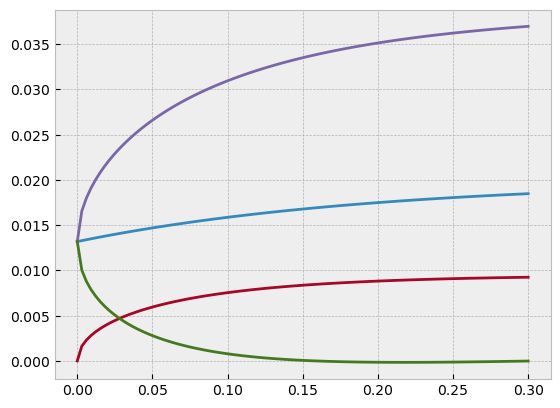

In [4]:
r_last = path[-1]
confidence_ts, line, std_dev = confidence_interval(k=k, theta=theta, sigma=sigma, r_0=r_last, forecast_period=forecast_period)
# confidence_ts += ts[-1]

plt.plot(confidence_ts, line)
plt.plot(confidence_ts, std_dev)
plt.plot(confidence_ts, line + 2*std_dev)
plt.plot(confidence_ts, line - 2*std_dev)


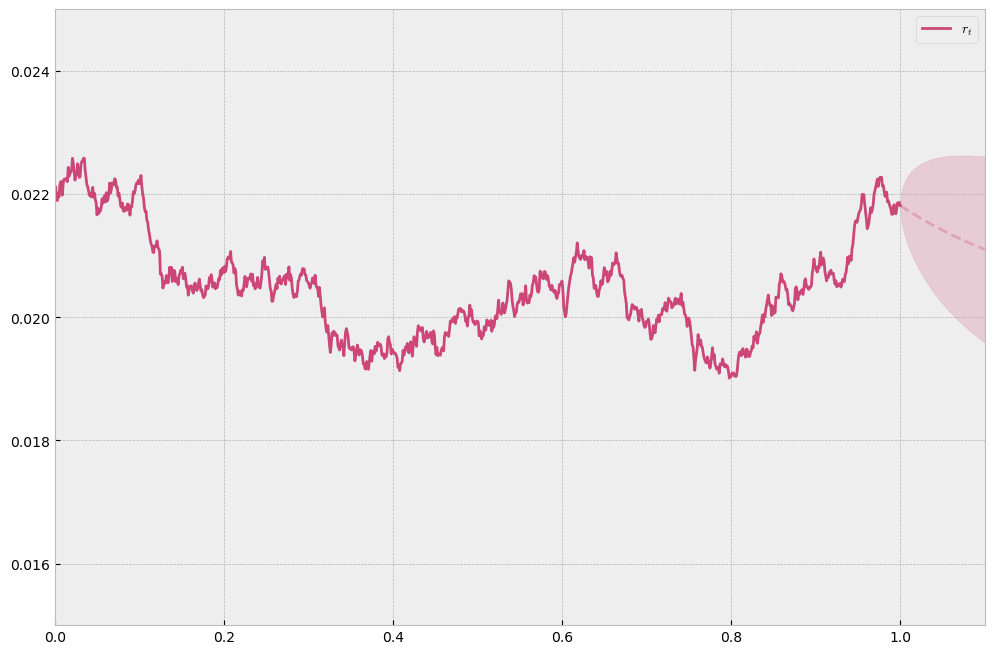

In [5]:
random.seed(13)

k = 5
theta = 0.02
sigma = 3e-03
cmap = plt.get_cmap('plasma')
forecast_period = 0.1

ts, path = simulate_path(k=k, theta=theta, sigma=sigma, r_0=0.022)
r_last = path[-1]

confidence_ts, trend_line, std_dev = confidence_interval(k=k, theta=theta, sigma=sigma, r_0=r_last, forecast_period=forecast_period)
confidence_ts += ts[-1]


fig = plt.figure(figsize=(12,8))
plt.plot(ts, path, c=cmap(0.5), label='$r_t$')
plt.plot(confidence_ts, trend_line, c=cmap(0.5), alpha=0.3, linestyle='--')

# plt.fill_between((0, 1.3), (y-ci), (y+ci), color='b', alpha=.1)
plt.fill_between(confidence_ts, trend_line - 2*std_dev, trend_line + 2*std_dev, color=cmap(0.5), alpha=.2)
plt.ylim(0.015,0.025)
plt.xlim(0,1 + forecast_period)
plt.legend()
plt.show()